In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score 

In [10]:
g = glob.glob( 'eRo*')
g

['eRo111_SDSS_stars.gz_pkl',
 'eRo111_train_cv_0.gz_pkl',
 'eRo111_train_cv_1.gz_pkl']

In [152]:
pd.read_pickle(file, compression='gzip').columns

Index(['nrow', 'objID', 'ra', 'dec', '__nrow__', '__kfold_idx__', '__idx__',
       'srcname', 'hpidx', 'RA_fin', 'DEC_fin', 'pos_r68', 'pos_r98',
       'DET_LIKE_0', 'EXT_LIKE', 'flux_05-20', 'distance'],
      dtype='object')

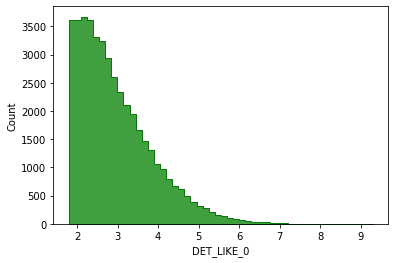

In [159]:
sns.histplot(np.log(pd.read_pickle(file, compression='gzip')['DET_LIKE_0']), bins = 50, color = 'g', element="step")

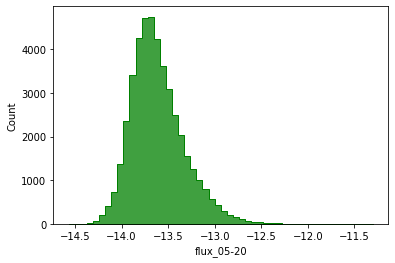

In [110]:
sns.histplot(np.log10(pd.read_pickle(file, compression='gzip')['flux_05-20']), bins = 50, color = 'g', element="step")

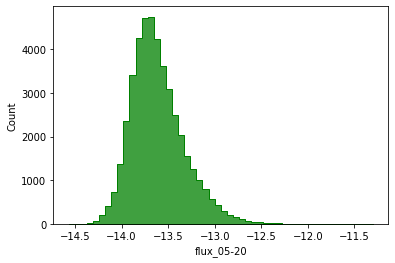

In [110]:
sns.histplot(np.log10(pd.read_pickle(file, compression='gzip')['flux_05-20']), bins = 50, color = 'g', element="step")

In [42]:
df0 ={}

In [43]:
i = 0
file = g[i]
df0[i] = df.loc[df['class']==1].merge(pd.read_pickle(file, compression='gzip'), left_on=['ra', 'dec'], right_on=['ra', 'dec'])
df0[i]['class'] = 1
df0[i]

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,hpidx,RA_fin,DEC_fin,pos_r68,pos_r98,DET_LIKE_0,EXT_LIKE,flux_05-20,distance,class
0,479930,202.282430,54.634649,14.284850,15.425760,13.446979,12.627240,12.330905,12.189954,15.378677,...,186563588749,202.283399,54.634345,4.174729,7.735428,25.135826,0.0,3.630290e-14,2.296179,1
1,369864,39.590202,25.929937,14.326030,16.863442,15.115750,14.334579,14.009822,13.850344,16.856726,...,15060056082,39.589059,25.929919,7.277106,13.483877,6.280754,0.0,9.218206e-15,3.701669,1
2,300688,9.479298,26.013941,14.439129,17.160359,15.317354,14.500675,14.171034,13.994981,17.174830,...,334696083322,9.481911,26.014916,6.113890,11.328534,6.878374,0.0,1.051401e-14,9.153028,1
3,406634,123.857630,84.116610,14.449013,16.818112,15.170976,14.467044,14.189930,14.021493,16.823102,...,136985954088,123.845344,84.116662,5.038214,9.335395,15.196437,0.0,1.774412e-14,4.537424,1
4,884497,46.596422,-0.998363,14.468092,17.233317,15.308717,14.480649,14.098463,13.865375,17.216415,...,389366708814,46.596344,-0.998226,4.399530,8.151965,21.908596,0.0,1.933372e-14,0.568464,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,33636,246.533860,42.500312,22.127343,21.658809,21.999410,22.133509,22.306408,22.364675,21.681056,...,164674816761,246.529306,42.500038,6.978357,12.930320,7.760191,0.0,6.747448e-15,12.128301,1
2563,806834,233.906570,43.701094,22.245507,23.532489,21.836118,22.079590,22.125115,21.398329,22.202184,...,165877541528,233.901539,43.704767,11.376208,21.079174,14.741174,0.0,1.445053e-14,18.606929,1
2564,946607,333.644180,30.955404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,225947002598,333.646252,30.954076,6.020128,11.154799,6.623434,0.0,1.320050e-14,7.986116,1
2565,213536,166.997760,40.986351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92686768157,166.997696,40.985530,6.412385,11.881620,9.204184,0.0,1.910367e-14,2.961850,1


In [139]:
i = 1
file = g[i]
df0[i] = df.loc[(df['class']!=1)&(df['fold']==0)].merge(pd.read_pickle(file, compression='gzip'), left_on=['ra', 'nrow', 'dec'], right_on=['ra', 'nrow', 'dec'])
df0[i]

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,srcname_y,hpidx_y,RA_fin_y,DEC_fin_y,pos_r68_y,pos_r98_y,DET_LIKE_0_y,EXT_LIKE_y,flux_05-20_y,distance_y
0,453196,206.976982,36.280128,16.644438,22.198778,21.314094,20.760918,20.670667,20.624419,17.940975,...,SRGe J134755.1+361654,175410724778,206.979613,36.281759,6.775859,12.555108,6.169856,0.0,8.721202e-15,9.631516
1,772787,259.895073,56.630057,14.139726,18.312714,16.448805,15.540049,15.163189,14.899742,16.827107,...,SRGe J171934.9+563746,170797665808,259.895384,56.629510,4.731451,8.766987,24.450706,0.0,1.043906e-14,2.065595
2,548546,247.908568,20.793413,13.464561,19.074462,17.129906,16.399443,16.016044,15.612305,16.137098,...,SRGe J163137.9+204733,154645805745,247.907898,20.792998,6.894065,12.774133,15.414277,0.0,2.102138e-14,2.704259
3,333054,213.158941,39.310165,13.121399,18.047111,16.453537,15.491993,15.253175,15.023999,15.744675,...,SRGe J141238.1+391837,177066176802,213.158753,39.310213,2.055201,3.808118,450.020447,0.0,1.926538e-13,0.550397
4,455321,204.030413,51.235844,12.641755,18.026839,16.220717,15.481072,15.171885,14.820889,15.082185,...,SRGe J133607.5+511401,185913826179,204.030202,51.233721,5.060361,9.376430,10.821436,0.0,1.626821e-14,7.660421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43420,663159,237.100051,33.583357,21.557481,23.955600,22.877011,21.541758,20.301673,20.230341,19.581051,...,SRGe J154823.8+333458,163337608553,237.099337,33.582852,4.857876,9.001243,28.659206,0.0,1.954968e-14,2.807908
43421,16849,199.558451,34.301560,20.630299,23.624191,23.950941,20.598178,19.050964,18.828305,20.306123,...,SRGe J131814.6+341808,175596450135,199.560358,34.302288,4.620519,8.561440,22.525185,0.0,3.061811e-14,6.248155
43422,483,42.838875,3.554839,20.822119,23.545984,24.572325,20.825097,19.073837,19.084101,20.372455,...,SRGe J025121.8+033313,563415264,42.839979,3.553695,6.244864,11.571217,6.626424,0.0,7.331872e-15,5.719484
43423,49249,208.202556,43.200799,20.294286,21.237082,20.486296,20.344924,19.745712,19.613339,21.229367,...,SRGe J135249.0+431154,179066369876,208.203737,43.198549,6.888697,12.764186,6.718158,0.0,1.252918e-14,8.674243


In [137]:
i = 2
file = g[i]
df0[i] = df.loc[(df['class']!=1)&(df['fold']==1)].merge(pd.read_pickle(file, compression='gzip'), left_on=['ra', 'nrow', 'dec'], right_on=['ra','nrow', 'dec'])
df0[i]

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,srcname_y,hpidx_y,RA_fin_y,DEC_fin_y,pos_r68_y,pos_r98_y,DET_LIKE_0_y,EXT_LIKE_y,flux_05-20_y,distance_y
0,68368,246.760658,43.476100,14.439499,19.142034,17.322290,16.645663,16.280081,15.875900,16.993196,...,SRGe J162702.7+432829,167638076734,246.761535,43.474782,5.948942,11.022899,6.422663,0.0,8.833740e-15,5.268699
1,403866,219.366072,25.765567,13.958411,18.728120,16.940069,16.223387,15.987089,15.549876,16.520879,...,SRGe J143727.9+254554,152487325167,219.366337,25.764975,3.627715,6.721857,44.929081,0.0,3.624496e-14,2.300513
2,431849,128.916510,46.491150,14.561439,16.920574,16.317291,15.868819,15.835323,15.488113,15.927072,...,SRGe J083540.2+462926,109482348823,128.916084,46.490900,5.782606,10.714691,11.586646,0.0,2.252059e-14,1.386330
3,617013,226.924211,14.622058,14.632084,19.202442,17.577484,16.869946,16.542395,16.034636,17.255238,...,SRGe J150741.5+143711,141090090857,226.923421,14.619548,5.938970,11.004420,14.568057,0.0,2.259587e-14,9.445869
4,471785,120.384620,42.002318,13.916896,18.783363,16.774163,15.957440,15.669195,15.275047,16.586878,...,SRGe J080132.4+420012,109949129273,120.384252,42.003805,4.352263,8.064383,31.930008,0.0,5.695997e-14,5.442789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44380,379158,176.740791,40.619063,20.968640,23.128555,23.847986,20.960905,19.388747,19.257523,20.048764,...,SRGe J114657.9+403705,91584091319,176.740547,40.617825,7.289888,13.507561,11.407630,0.0,2.113462e-14,4.509658
44381,405,245.813667,47.099972,20.864200,23.196904,24.915909,20.873857,19.518247,19.236609,21.138404,...,SRGe J162315.7+470556,168179223087,245.815838,47.098898,6.200832,11.489630,12.235384,0.0,1.067158e-14,6.578063
44382,382,22.863917,-3.350053,20.100102,23.504853,24.186759,20.165938,18.466278,18.018938,23.073629,...,SRGe J013127.1-032058,296113606660,22.862819,-3.349910,3.315702,6.143721,41.715862,0.0,4.836922e-14,3.978323
44383,309,136.628125,69.508556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SRGe J090631.0+693031,133257339523,136.627656,69.509016,4.780882,8.858579,18.720903,0.0,2.670578e-14,1.761242


In [141]:
np.sum(pd.read_pickle(file, compression='gzip')['class']==3)

KeyError: 'class'

In [46]:
dff=pd.DataFrame([])
for i in range(3):
    dff = dff.append(df0[i])

In [48]:
dff['STAR_sdssdr16+psdr2+all_decals8tr']

0        0.978828
1        0.998059
2        0.997869
3        0.998786
4        0.994103
           ...   
44360    0.029853
44361    0.030416
44362    0.152787
44363    0.333633
44364    0.655052
Name: STAR_sdssdr16+psdr2+all_decals8tr, Length: 90341, dtype: float64

In [17]:
df.loc[(df['class']!=1)&(df['fold']==0)].sort_values(['ra'])

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,STAR_decals8tr,QSO_decals8tr,GALAXY_decals8tr,STAR_sdssdr16+psdr2+wise_decals8tr,QSO_sdssdr16+psdr2+wise_decals8tr,GALAXY_sdssdr16+psdr2+wise_decals8tr,STAR_sdssdr16+psdr2+all_decals8tr,QSO_sdssdr16+psdr2+all_decals8tr,GALAXY_sdssdr16+psdr2+all_decals8tr,fold
82572,659337,0.000722,11.343983,20.022022,23.376900,22.425905,20.799930,20.031074,19.622680,20.226514,...,0.000841,0.000528,0.998631,0.000484,0.001180,0.998336,0.000535,0.000406,0.999058,0
138374,271826,0.001417,18.492306,20.901523,22.113601,22.968215,21.524378,20.363373,19.827644,22.126405,...,0.001226,0.000202,0.998572,0.000613,0.000401,0.998987,0.000920,0.000376,0.998705,0
489750,412133,0.002769,14.974691,20.796740,21.761608,21.095956,20.797531,20.715893,20.589152,21.633194,...,0.002939,0.992526,0.004535,0.001942,0.997427,0.000631,0.002336,0.996468,0.001196,0
144702,451387,0.003054,22.654332,20.493850,22.684776,23.152460,21.731625,20.628266,19.740513,21.088216,...,0.002923,0.000182,0.996894,0.001027,0.000288,0.998685,0.001176,0.000216,0.998608,0
280754,761492,0.005322,-2.033259,19.145615,20.426737,19.852521,19.136067,18.887478,18.803872,20.472139,...,0.006347,0.990943,0.002710,0.005290,0.992380,0.002330,0.005430,0.993918,0.000653,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572279,294346,359.998880,25.977345,21.955914,23.082068,22.159815,21.990681,22.338593,21.472393,23.097422,...,0.001078,0.998593,0.000329,0.015801,0.981892,0.002307,0.003922,0.995112,0.000965,0
471603,747890,359.998949,10.116818,21.133008,23.056658,21.692741,21.373058,21.151950,21.260001,21.525019,...,0.005025,0.979835,0.015140,0.013982,0.970348,0.015671,0.004326,0.983483,0.012191,0
296539,222947,359.999026,24.413551,20.457672,20.921111,20.732991,20.529058,20.355686,20.119849,20.765828,...,0.009441,0.980783,0.009776,0.000317,0.999320,0.000363,0.000594,0.998928,0.000478,0
253727,680552,359.999634,3.268618,18.573273,18.791953,18.815835,18.557703,18.614296,18.673656,18.798606,...,0.000810,0.998387,0.000803,0.000536,0.998988,0.000476,0.000524,0.999119,0.000358,0


In [33]:
df1 = pd.concat([pd.read_pickle(file, compression='gzip') for file in glob.glob( 'eRo*')])#переделать на мердж

In [36]:
for i in df1.columns:
    print(i)

objID
ra
dec
z
zErr
class
subClass
psfMag_u
psfMag_g
psfMag_r
psfMag_i
psfMag_z
cModelMag_u
cModelMag_g
cModelMag_r
cModelMag_i
cModelMag_z
srcname
hpidx
RA_fin
DEC_fin
pos_r68
pos_r98
DET_LIKE_0
EXT_LIKE
flux_05-20
distance
nrow
__nrow__
__kfold_idx__
__idx__


In [17]:
!ls /home/nmalysheva/pred_for_fold

cv0_pred.gz_pkl
cv1_pred.gz_pkl
pred.gz_pkl
Как я скачивала данные с диска о предсказаниях на два фолда.ipynb


In [186]:
df_all_star= pd.read_pickle('/home/nmalysheva/star_fold.gz_pkl', compression='gzip')

In [189]:
for i in df_all_star.columns:
    print(i)

nrow
ra
dec
zspec
zspec_conf
sdssdr16_r_cmodel
sdssdr16_u_psf
sdssdr16_g_psf
sdssdr16_r_psf
sdssdr16_i_psf
sdssdr16_z_psf
sdssdr16_u_cmodel
sdssdr16_i_cmodel
sdssdr16_u-g_psf
sdssdr16_u-r_psf
sdssdr16_u-i_psf
sdssdr16_u-z_psf
sdssdr16_u_psf-cmodel
sdssdr16_g-i_psf
sdssdr16_g_psf-cmodel
sdssdr16_r-i_psf
sdssdr16_i-z_psf
sdssdr16_i_psf-cmodel
sdssdr16_u_cmodel-decals8tr_Lw1
sdssdr16_u_cmodel-decals8tr_Lw2
sdssdr16_g_cmodel-decals8tr_Lw1
sdssdr16_g_cmodel-decals8tr_Lw2
sdssdr16_r_cmodel-decals8tr_Lw1
sdssdr16_r_cmodel-decals8tr_Lw2
sdssdr16_i_cmodel-decals8tr_Lw1
sdssdr16_i_cmodel-decals8tr_Lw2
sdssdr16_z_cmodel-decals8tr_Lw1
sdssdr16_z_cmodel-decals8tr_Lw2
psdr2_i_kron
psdr2_y_kron
psdr2_g_psf
psdr2_r_psf
psdr2_i_psf
psdr2_z_psf
psdr2_y_psf
psdr2_g-i_psf
psdr2_g-y_psf
psdr2_r-i_psf
psdr2_r-y_psf
psdr2_i-z_psf
psdr2_i-y_psf
psdr2_i_psf-kron
psdr2_z-y_psf
psdr2_y_psf-kron
psdr2_g_kron-decals8tr_Lw1
psdr2_g_kron-decals8tr_Lw2
psdr2_r_kron-decals8tr_Lw1
psdr2_r_kron-decals8tr_Lw2
psdr2_i_kro

In [15]:
df['class']

0         3
1         3
5         3
6         3
11        3
         ..
94372     1
95296     1
97481     1
98291     1
100222    1
Name: class, Length: 1427668, dtype: int64

In [21]:
df.merge(df0, left_on=['ra', 'dec'], right_on=['ra', 'dec'])

,nrow_x,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,pos_r68,pos_r98,DET_LIKE_0,EXT_LIKE,flux_05-20,distance,nrow_y,__nrow__,__kfold_idx__,__idx__
0,453196,206.976982,36.280128,16.644438,22.198778,21.314094,20.760918,20.670667,20.624419,17.940975,...,6.775859,12.555108,6.169856,0.0,8.721202e-15,9.631516,453196.0,11.0,0.0,26.0
1,772787,259.895073,56.630057,14.139726,18.312714,16.448805,15.540049,15.163189,14.899742,16.827107,...,4.731451,8.766987,24.450706,0.0,1.043906e-14,2.065595,772787.0,16.0,0.0,34.0
2,548546,247.908568,20.793413,13.464561,19.074462,17.129906,16.399443,16.016044,15.612305,16.137098,...,6.894065,12.774133,15.414277,0.0,2.102138e-14,2.704259,548546.0,51.0,0.0,100.0
3,333054,213.158941,39.310165,13.121399,18.047111,16.453537,15.491993,15.253175,15.023999,15.744675,...,2.055201,3.808118,450.020447,0.0,1.926538e-13,0.550397,333054.0,56.0,0.0,109.0
4,455321,204.030413,51.235844,12.641755,18.026839,16.220717,15.481072,15.171885,14.820889,15.082185,...,5.060361,9.376430,10.821436,0.0,1.626821e-14,7.660421,455321.0,74.0,0.0,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90336,33636,246.533860,42.500312,22.127343,21.658809,21.999410,22.133509,22.306408,22.364675,21.681056,...,6.978357,12.930320,7.760191,0.0,6.747448e-15,12.128301,NaN,NaN,NaN,NaN
90337,806834,233.906570,43.701094,22.245507,23.532489,21.836118,22.079590,22.125115,21.398329,22.202184,...,11.376208,21.079174,14.741174,0.0,1.445053e-14,18.606929,NaN,NaN,NaN,NaN
90338,946607,333.644180,30.955404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.020128,11.154799,6.623434,0.0,1.320050e-14,7.986116,NaN,NaN,NaN,NaN
90339,213536,166.997760,40.986351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.412385,11.881620,9.204184,0.0,1.910367e-14,2.961850,NaN,NaN,NaN,NaN


In [58]:
model = '_sdssdr16+psdr2+all_decals8tr'
classs = {1: 'STAR', 3: 'GALAXY', 2:'QSO'}

In [116]:
df.loc[(df['class'] == cl)][classs[cl]+model]

0       0.978828
1       0.998059
2       0.997869
3       0.998786
4       0.994103
          ...   
2562    0.941104
2563    0.988733
2564    0.862332
2565    0.862332
2566    0.862332
Name: STAR_sdssdr16+psdr2+all_decals8tr, Length: 2567, dtype: float64

In [181]:
threshold = 0.5
def recall(pred, threshold=0.5):
    a = 1 *(pred > threshold)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

def recall_add(pred, threshold=0.5):
    a = 1 *(np.max(pred, axis=1) > threshold)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

def not_true(pred, threshold=0.5):
    a = 1 *(pred < threshold)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

from sklearn.metrics import roc_curve, roc_auc_score

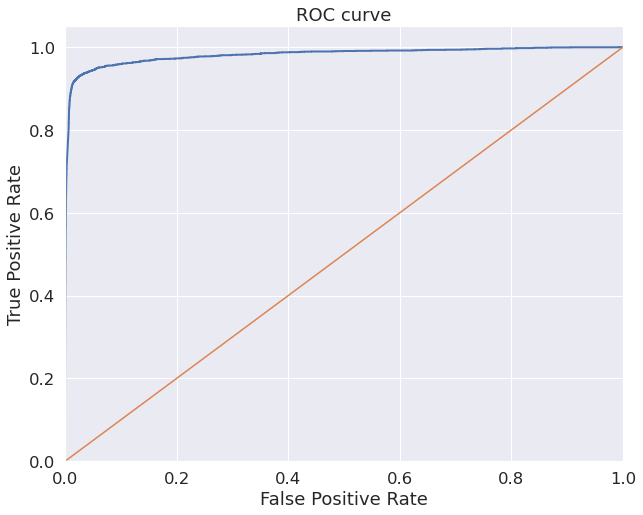

In [180]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
cl = 1
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(1*(df['class']==cl), df[classs[cl]+model], pos_label=1)
lw = 2 
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [250]:
rec = {}#1
name = 'DET_LIKE_0'
columns = ['log_'+name, 'recall', 'roc-auc', 'count']
rec['STAR'] = pd.DataFrame([], columns=columns)
rec['GALAXY'] = pd.DataFrame([], columns=columns)
rec['QSO'] = pd.DataFrame([], columns=columns)
cl = 1
for cl in range(1,4):
    flax = [0, 3.0, 4.0, 10.0]
    for i in range(len(flax)-1):
        tmp0 = df.loc[(np.log(df[name]) > flax[i])&(np.log(df[name]) < flax[i+1])]
        tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), 
             recall(tmp), 
             roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]), 
             len(tmp)]
        rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
pd.concat(rec, axis=1).sort_index()

STAR                    GALAXY                       QSO  \
                  recall   roc-auc count    recall   roc-auc count    recall   
log_DET_LIKE_0                                                                 
[0, 3.0]        0.903665  0.987603  1910  0.965398  0.998448  1156  0.985702   
[3.0, 4.0]      0.815508  0.968033   374  0.940510  0.996670   353  0.986980   
[4.0, 10.0]     0.626335  0.960867   281  0.916427  0.993981   347  0.978439   

                                 
                 roc-auc  count  
log_DET_LIKE_0                   
[0, 3.0]        0.991933  51897  
[3.0, 4.0]      0.983750  22658  
[4.0, 10.0]     0.974393  11363

In [266]:
rec = {}#1
name = 'flux_05-20'
columns = ['log_'+name, 'recall', 'roc-auc', 'count']
rec['STAR'] = pd.DataFrame([], columns=columns)
rec['GALAXY'] = pd.DataFrame([], columns=columns)
rec['QSO'] = pd.DataFrame([], columns=columns)
cl = 1
for cl in range(1,4):
    flax = [-14.5, -14.0, -13.5, -11.0]
    for i in range(len(flax)-1):
        tmp0 = df.loc[(np.log10(df[name]) > flax[i])&(np.log10(df[name]) < flax[i+1])]
        tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), 
             recall(tmp), 
             roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]), 
             len(tmp)]
        rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
    flax = [-14.0, np.inf]
    for i in range(len(flax)-1):
        tmp0 = df.loc[(np.log10(df[name]) > flax[i])&(np.log10(df[name]) < flax[i+1])]
        tmp = tmp0.loc[tmp0['class'] == cl][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), 
             recall(tmp), 
             roc_auc_score(1*(tmp0['class']==cl), tmp0[classs[cl]+model]), 
             len(tmp)]
        rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)        
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
pd.concat(rec, axis=1).sort_index()

STAR                    GALAXY                       QSO  \
                  recall   roc-auc count    recall   roc-auc count    recall   
log_flux_05-20                                                                 
[-13.5, -11.0]  0.693762  0.959096   529  0.923333  0.994756   600  0.982107   
[-14.0, -13.5]  0.902968  0.987636  1752  0.964991  0.998489  1114  0.986472   
[-14.0, inf]    0.853327  0.980671  2284  0.950408  0.997303  1714  0.985120   
[-14.5, -14.0]  0.908088  0.989111   272  0.964539  0.998916   141  0.984330   

                                 
                 roc-auc  count  
log_flux_05-20                   
[-13.5, -11.0]  0.976784  25206  
[-14.0, -13.5]  0.992179  56180  
[-14.0, inf]    0.987778  81386  
[-14.5, -14.0]  0.991529   4531

In [252]:
rec = {}#5
name = 'DET_LIKE_0'
columns = ['log_'+name, 'recall', 'count']
for sub in sub_class:
    rec[sub] = pd.DataFrame([], columns=columns)
    flax = [0, 3.0, 4.0, 10.0]
    cl=1
    for i in range(len(flax)-1):
        tmp = df.loc[(df['class'] == cl)&(df['subClass'] == sub)&(np.log(df[name]) > flax[i])&(np.log(df[name]) < flax[i+1])][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), recall(tmp), len(tmp)]
        rec[sub] = rec[sub].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
sub_res = pd.concat(rec, axis=1).sort_index()
sub_res

K              OB               M               A  \
                  recall count    recall count    recall count    recall   
log_DET_LIKE_0                                                             
[0, 3.0]        0.942308   312  0.714286    28  0.942272   537  0.904762   
[3.0, 4.0]      0.957746    71  0.571429     7  0.920000   125  0.750000   
[4.0, 10.0]     0.790698    43  0.181818    11  0.818182    55  0.500000   

                             G               F               C        \
               count    recall count    recall count    recall count   
log_DET_LIKE_0                                                         
[0, 3.0]         105  0.854545   165  0.957265   585  0.533333    75   
[3.0, 4.0]        20  0.769231    26  0.900000    60  0.575000    40   
[4.0, 10.0]        8  0.714286    14  0.848485    33  0.543478    92   

                      LT              WD        
                  recall count    recall count  
log_DET_LIKE_0                                  
[0, 3.0]        0.343750    32  0.830986    71  
[3.0, 4.0]      0.000000    16  0.666667     9  
[4.0, 10.0]     0.052632    19  0.333333     6

In [255]:
rec = {}#5
name = 'flux_05-20'
columns = ['log_'+name, 'recall', 'count']
for sub in sub_class:
    rec[sub] = pd.DataFrame([], columns=columns)
    flax = [-np.inf, -14.0, -13.5, -11.0]
    cl=1
    for i in range(len(flax)-1):
        tmp = df.loc[(df['class'] == cl)&(df['subClass'] == sub)&(np.log10(df[name]) > flax[i])&(np.log10(df[name]) < flax[i+1])][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), recall(tmp), len(tmp)]
        rec[sub] = rec[sub].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
sub_res = pd.concat(rec, axis=1).sort_index()
sub_res

K              OB               M               A  \
                  recall count    recall count    recall count    recall   
log_flux_05-20                                                             
[-13.5, -11.0]  0.830986    71  0.294118    17  0.875000   128  0.681818   
[-14.0, -13.5]  0.941558   308  0.739130    23  0.941860   516  0.881720   
[-inf, -14.0]   1.000000    47  0.800000     5  0.931507    73  0.944444   

                             G               F               C        \
               count    recall count    recall count    recall count   
log_flux_05-20                                                         
[-13.5, -11.0]    22  0.722222    36  0.875000    80  0.539062   128   
[-14.0, -13.5]    93  0.848276   145  0.964072   501  0.560000    75   
[-inf, -14.0]     18  0.916667    24  0.917526    97  0.500000     4   

                      LT              WD        
                  recall count    recall count  
log_flux_05-20                                  
[-13.5, -11.0]  0.062500    32  0.600000    15  
[-14.0, -13.5]  0.241379    29  0.838710    62  
[-inf, -14.0]   0.500000     6  0.666667     9

In [264]:
rec = {}
columns = ['log_10_flax', 'recall', 'count']
rec['STAR'] = pd.DataFrame([], columns=columns)
rec['GALAXY'] = pd.DataFrame([], columns=columns)
rec['QSO'] = pd.DataFrame([], columns=columns)

cl = 1
for cl in range(1,4):
    flax = [-14.5, -14.0, -13.5, -11.0]
    for i in range(len(flax)-1):
        tmp = df.loc[(df['class'] == cl)&(np.log10(df['flux_05-20']) > flax[i])&(np.log10(df['flux_05-20']) < flax[i+1])][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), recall(tmp), len(tmp)]
        rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
    flax = [-14.0, np.inf]
    for i in range(len(flax)-1):
        tmp = df.loc[(df['class'] == cl)&(np.log10(df['flux_05-20']) > flax[i])&(np.log10(df['flux_05-20']) < flax[i+1])][classs[cl]+model]
        a = [str([flax[i], flax[i+1]]), recall(tmp), len(tmp)]
        rec[classs[cl]] = rec[classs[cl]].append(pd.DataFrame([a], columns=columns), ignore_index=True)
        
for i, r in rec.items():
    rec[i] = r.set_index(columns[0])
pd.concat(rec, axis=1).sort_index()

STAR          GALAXY             QSO       
                  recall count    recall count    recall  count
log_10_flax                                                    
[-13.5, -11.0]  0.693762   529  0.923333   600  0.982107  25206
[-14.0, -13.5]  0.902968  1752  0.964991  1114  0.986472  56180
[-14.0, inf]    0.853327  2284  0.950408  1714  0.985120  81386
[-14.5, -14.0]  0.908088   272  0.964539   141  0.984330   4531

In [136]:
np.sum(df['class'] == 3)

1856

In [50]:
df = dff

In [219]:
def recall(pred):
    a = 1 *(pred > 0.5)
    if len(a) > 0:
        return sum(a) / len(a)
    else:
        return None

def recall_add(pred):
    a = 1 *(np.max(pred, axis=1) > 0.5)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

def not_true(pred):
    a = 1 *(pred < 0.5)
    assert len(a) > 0, 'Ampty array'
    return sum(a) / len(a)

In [79]:
i = 1
recall(df.loc[(df['class'] == i)][classs[1]+model]), recall(df.loc[(df['class'] == i)][classs[2]+model]), recall(df.loc[(df['class'] == i)][classs[3]+model]) 

(0.859758472925594, 0.10634982469809116, 0.027269185820023373)

In [80]:
i = 2
recall(df.loc[(df['class'] == i)][classs[1]+model]), recall(df.loc[(df['class'] == i)][classs[2]+model]), recall(df.loc[(df['class'] == i)][classs[3]+model]) 

(0.007949440163877185, 0.9850787960613608, 0.006215228473660932)

In [81]:
i = 3
recall(df.loc[(df['class'] == i)][classs[1]+model]), recall(df.loc[(df['class'] == i)][classs[2]+model]), recall(df.loc[(df['class'] == i)][classs[3]+model]) 

(0.010237068965517241, 0.03556034482758621, 0.9515086206896551)

In [72]:
recall_add(df.loc[(df['class'] != 1)][[classs[2]+model, classs[3]+model]])

0.9912046847585846

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

['K' 'OB' 'M' 'A' 'G' 'F' 'C' 'LT' 'WD'] [379, 41, 644, 115, 182, 581, 203, 62, 77]


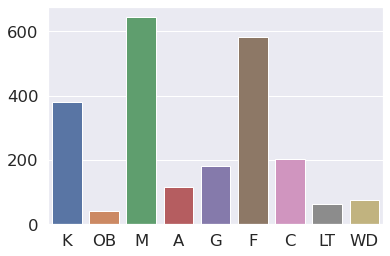

In [384]:
df_star = df.loc[(df['class'] == 1)&(np.log10(df['flux_05-20']) > -14.0)]
sub_class = df_star['subClass'].unique()
x0 = sub_class
y0 = [len(df_star.loc[df_star['subClass'] == i]) for i in x0]
print(x0, y0)

sns.barplot(x=x0, y=y0);

In [375]:
for i in sub_class:
    print(i)
    print(len(df_star.loc[df_star['subClass'] == i]))
    print(df_star.loc[df_star['subClass'] == i]['subClass'].head(2))

K
379
0    K
2    K
Name: subClass, dtype: object
OB
41
172    OB
173    OB
Name: subClass, dtype: object
M
644
193    M
194    M
Name: subClass, dtype: object
A
115
464    A
465    A
Name: subClass, dtype: object
G
182
518    G
519    G
Name: subClass, dtype: object
F
581
598    F
599    F
Name: subClass, dtype: object
C
203
889    C
890    C
Name: subClass, dtype: object
LT
62
978    LT
979    LT
Name: subClass, dtype: object
WD
77
1007    WD
1008    WD
Name: subClass, dtype: object


In [245]:
len(df.loc[(df['class'] == 1)])

2567

In [199]:
sub_or, count_sub = ['F', 'G', 'WD', 'M', 'K', 'A', 'OB', 'LT', 'C'], [368391, 93824, 34510, 181441, 153895, 95473, 13739, 8008, 14470]

In [376]:
add = pd.DataFrame([[368391, 93824, 34510, 181441, 153895, 95473, 13739, 8008, 14470]], columns=['F', 'G', 'WD', 'M', 'K', 'A', 'OB', 'LT', 'C'])

In [377]:
add

,F,G,WD,M,K,A,OB,LT,C
0,368391,93824,34510,181441,153895,95473,13739,8008,14470


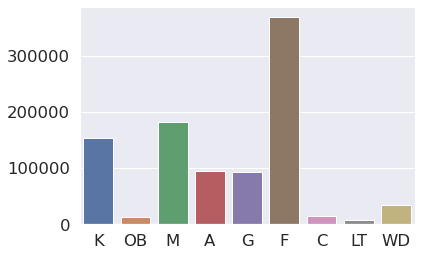

In [378]:
sns.barplot(x=sub_class, y=[add[i].values[0] for i in sub_class]);

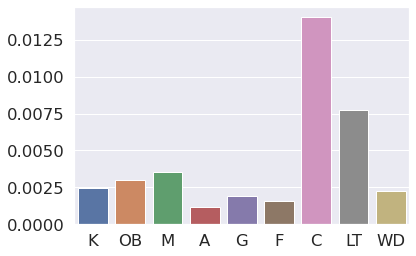

In [381]:
sns.barplot(x=sub_class, y=y0 / np.array([add[i].values[0] for i in sub_class]));

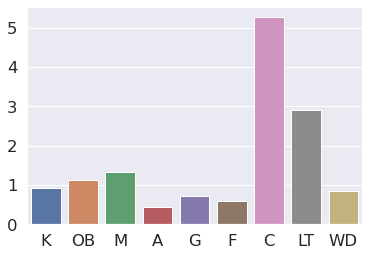

In [382]:
sns.barplot(x=x0, y=(y0 / np.array([add[i].values[0] for i in x0])*(963751/2567)));

In [246]:
2567/963751

0.0026635510624632296

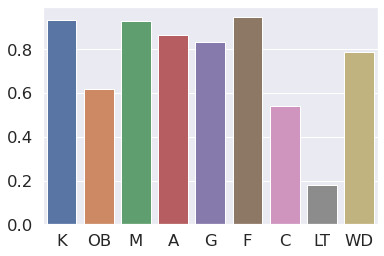

In [242]:
sns.barplot(x=x, y=[sub_res[(i, 'recall')]['[0, 3.0]'] for i in x]);

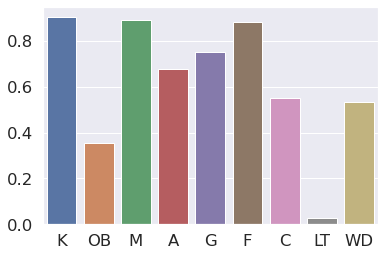

In [243]:
sns.barplot(x=x, y=[sub_res[(i, 'recall')]['[3.0, 4.0]'] for i in x]);

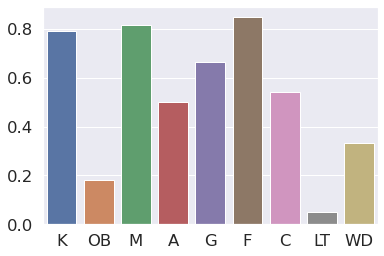

In [244]:
sns.barplot(x=x, y=[sub_res[(i, 'recall')]['[4.0, 10.0]'] for i in x]);

In [279]:
for i in df_star.columns:
    print(i)

nrow
ra
dec
sdssdr16_r_cmodel
sdssdr16_u_psf
sdssdr16_g_psf
sdssdr16_r_psf
sdssdr16_i_psf
sdssdr16_z_psf
sdssdr16_u_cmodel
sdssdr16_i_cmodel
sdssdr16_u-g_psf
sdssdr16_u-r_psf
sdssdr16_u-i_psf
sdssdr16_u-z_psf
sdssdr16_u_psf-cmodel
sdssdr16_g-i_psf
sdssdr16_g_psf-cmodel
sdssdr16_r-i_psf
sdssdr16_i-z_psf
sdssdr16_i_psf-cmodel
sdssdr16_u_cmodel-decals8tr_Lw1
sdssdr16_u_cmodel-decals8tr_Lw2
sdssdr16_g_cmodel-decals8tr_Lw1
sdssdr16_g_cmodel-decals8tr_Lw2
sdssdr16_r_cmodel-decals8tr_Lw1
sdssdr16_r_cmodel-decals8tr_Lw2
sdssdr16_i_cmodel-decals8tr_Lw1
sdssdr16_i_cmodel-decals8tr_Lw2
sdssdr16_z_cmodel-decals8tr_Lw1
sdssdr16_z_cmodel-decals8tr_Lw2
psdr2_i_kron
psdr2_y_kron
psdr2_g_psf
psdr2_r_psf
psdr2_i_psf
psdr2_z_psf
psdr2_y_psf
psdr2_g-i_psf
psdr2_g-y_psf
psdr2_r-i_psf
psdr2_r-y_psf
psdr2_i-z_psf
psdr2_i-y_psf
psdr2_i_psf-kron
psdr2_z-y_psf
psdr2_y_psf-kron
psdr2_g_kron-decals8tr_Lw1
psdr2_g_kron-decals8tr_Lw2
psdr2_r_kron-decals8tr_Lw1
psdr2_r_kron-decals8tr_Lw2
psdr2_i_kron-decals8tr_Lw1
p

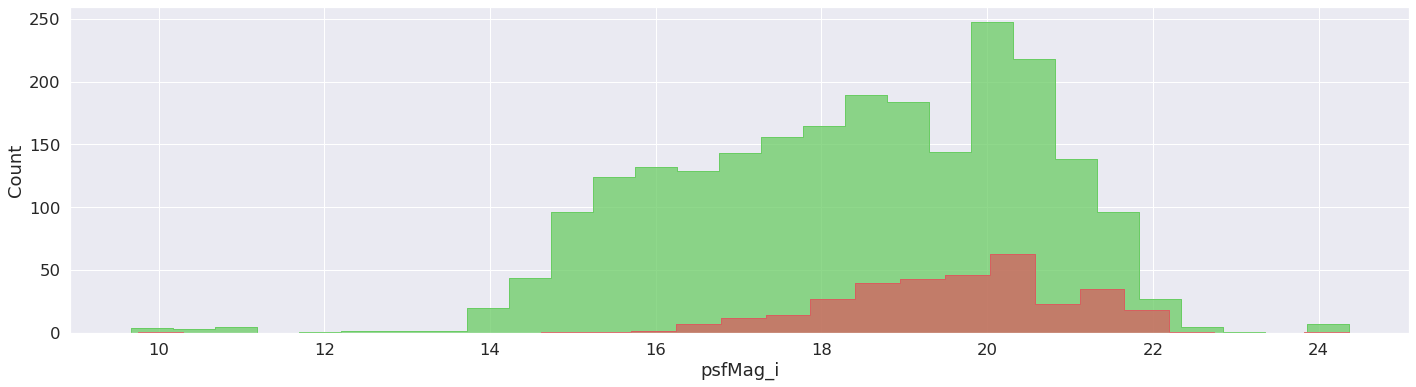

In [302]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
sns.histplot(df_star['psfMag_i'], ax=ax1, color = 'g', element="step")
sns.histplot(df_star.loc[df_star['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5]['psfMag_i'], ax=ax1, color = 'r', element="step")

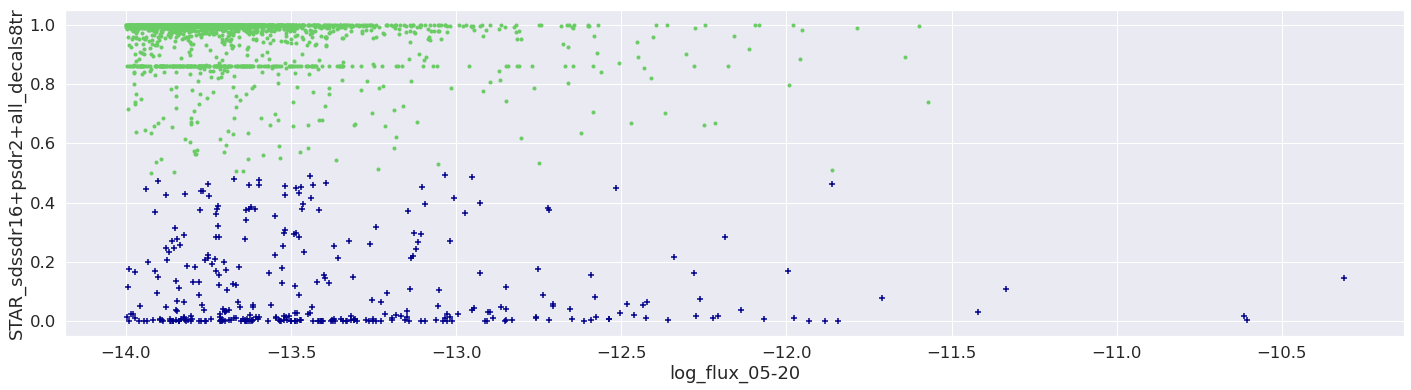

In [301]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (24, 6))
p = df_star.loc[(df_star['STAR_sdssdr16+psdr2+all_decals8tr'] > 0.5)]
x = 'log_flux_05-20'
y = 'STAR_sdssdr16+psdr2+all_decals8tr'#'psfMag_i'
plt.xlabel(x)
plt.ylabel(y)
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'g', marker = '.')
p = df_star.loc[(df_star['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5)]
ax1.scatter(np.log10(p['flux_05-20']),p[y], c = 'darkblue', marker = '+')

In [97]:
df_star = df_all.loc[(df_all['class'] == 1)]
sub_class = df_star['subClass'].unique()
x = sub_class
y = [len(df_star.loc[df_star['subClass'] == i]) for i in x]
print(x, y)

sns.barplot(x=x, y=y);

KeyError: 'subClass'

In [ ]:
#только звезды и тих чтения (за час можно справиться) + алгоритмы 1-2 лекции, питон - лекции, потому что я ничего не знаю (3-4 часа)

0 K [0, 0]
1 OB [0, 1]
2 M [0, 2]
3 A [1, 0]
4 G [1, 1]
5 F [1, 2]
6 C [2, 0]
7 LT [2, 1]
8 WD [2, 2]


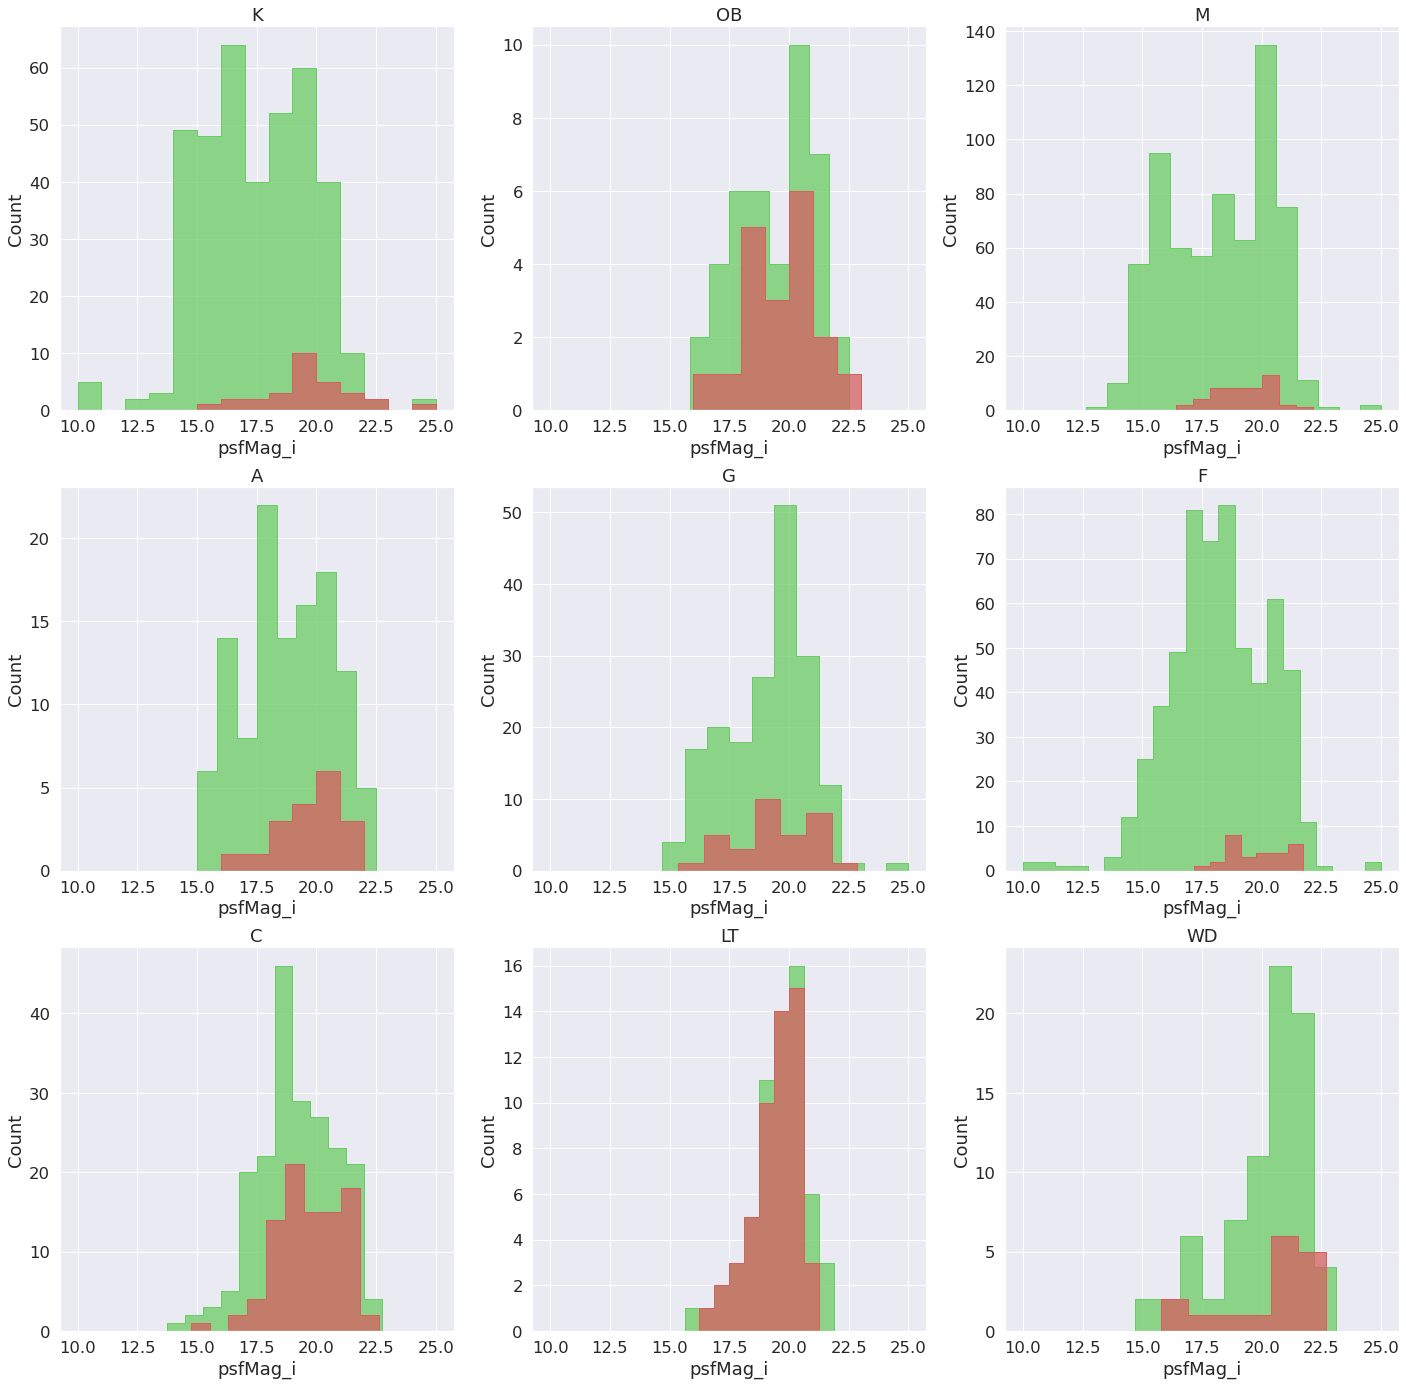

In [385]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))

for en, i in enumerate(sub_class):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    sns.histplot(df_star.loc[(df_star['subClass'] == i)]['psfMag_i'], ax=ax[j[0]][j[1]], color = 'g', element="step", binrange=(10, 25))
    sns.histplot(df_star.loc[(df_star['subClass'] == i)&(df_star['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5)]['psfMag_i'], ax=ax[j[0]][j[1]], color = 'r', element="step", binrange=(10, 25))

In [347]:
sub_class

array(['K', 'OB', 'M', 'A', 'G', 'F', 'C', 'LT', 'WD'], dtype=object)

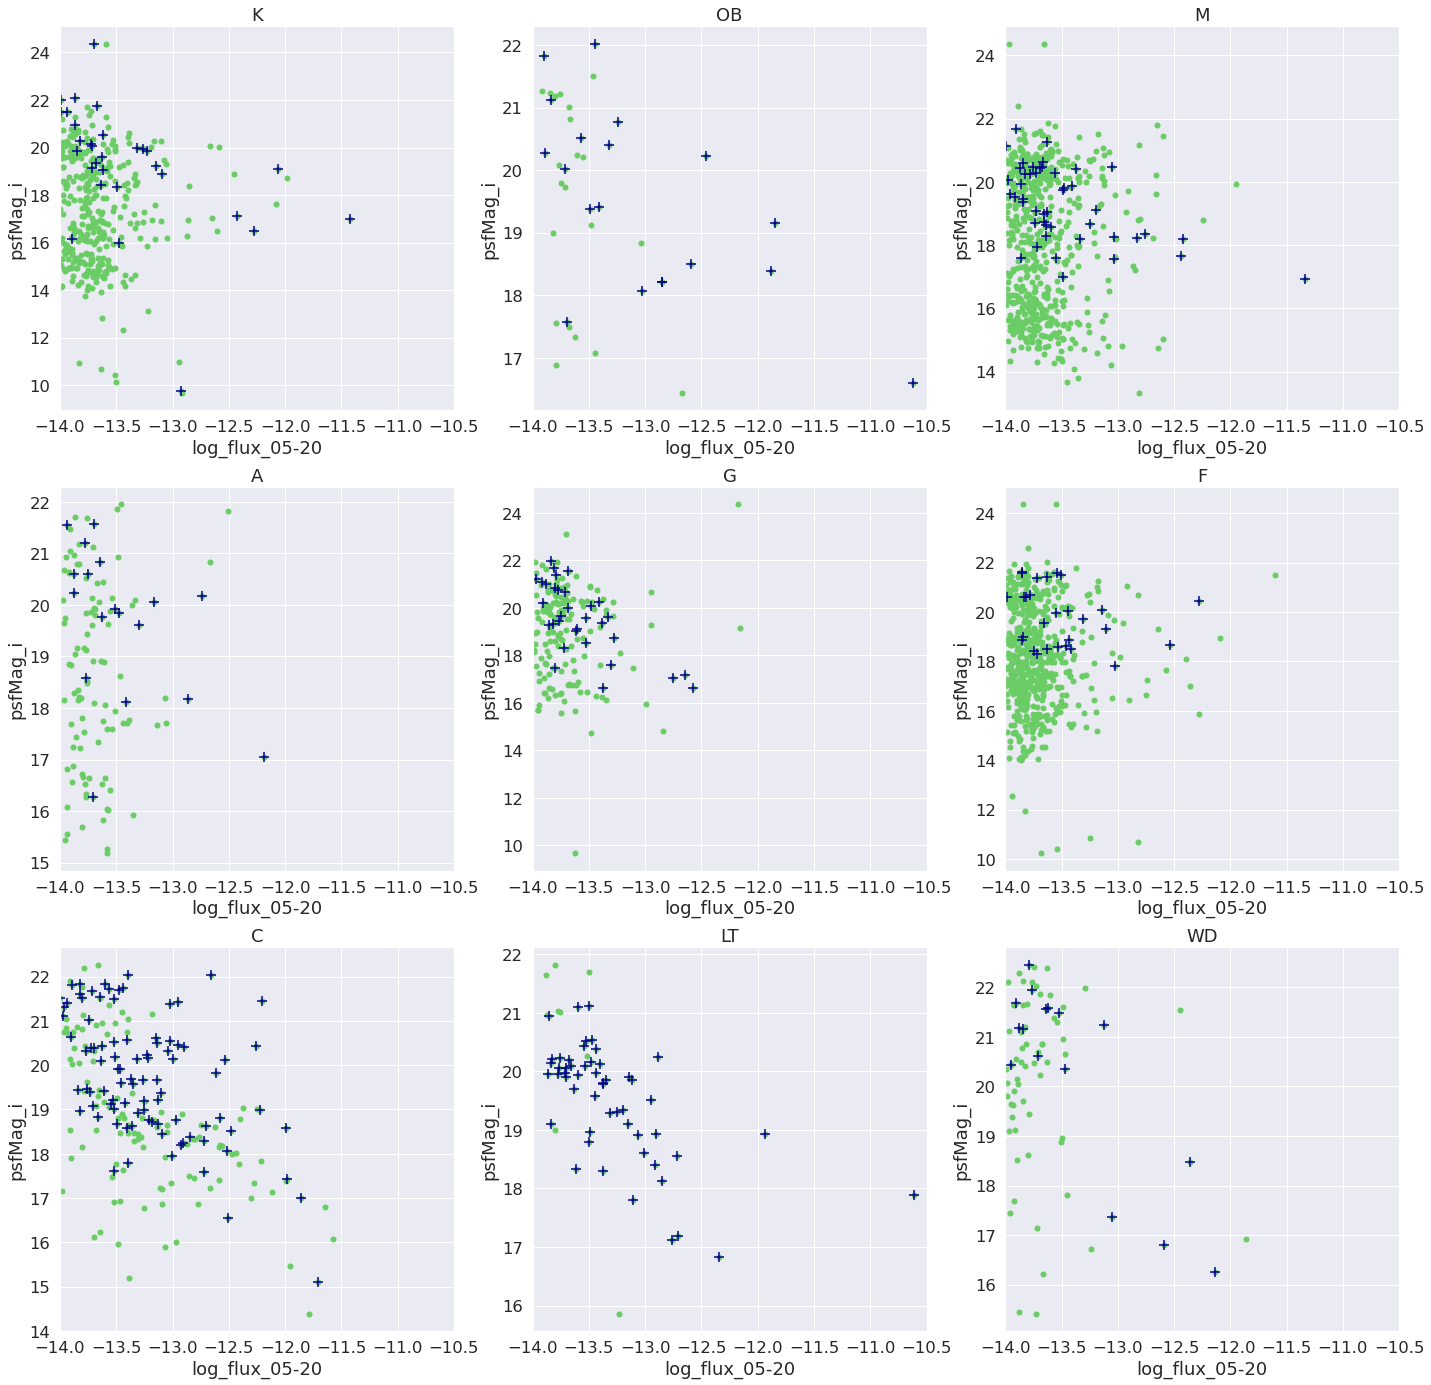

In [387]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))
x = 'log_flux_05-20'
y = 'psfMag_i'
for en, i in enumerate(sub_class):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    ax[j[0]][j[1]].set_xlabel(x)
    ax[j[0]][j[1]].set_ylabel(y)
    ax[j[0]][j[1]].set_xlim([-14.0, -10.5])
    p = df_star.loc[(df_star['subClass'] == i)]
    ax[j[0]][j[1]].scatter(np.log10(p['flux_05-20']),p[y], c = 'g', marker = '.', s=100)
    ax[j[0]][j[1]].scatter(np.log10(p.loc[p['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5]['flux_05-20']),p.loc[p['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5][y], c = 'darkblue', marker = '+', s=100)


In [331]:
star_agr = pd.read_pickle('../../OB-S(non-OB)-G-Q_PanSTARRS+GAIA/data/star_agr.pkl_gz', compression='gzip')

In [332]:
star_agr

,objID,nrow,subClass,ra,dec,skycoord.ra,skycoord.dec,__workxid__,ls_sep_input,ls_release,...,ps_zPSFMag--ps_yPSFMag,ps_zPSFMag--gaiaedr3_phot_g_mean_Mag,ps_zPSFMag--gaiaedr3_phot_bp_mean_Mag,ps_zPSFMag--gaiaedr3_phot_rp_mean_Mag,ps_yPSFMag--gaiaedr3_phot_g_mean_Mag,ps_yPSFMag--gaiaedr3_phot_bp_mean_Mag,ps_yPSFMag--gaiaedr3_phot_rp_mean_Mag,gaiaedr3_phot_g_mean_Mag--gaiaedr3_phot_bp_mean_Mag,gaiaedr3_phot_g_mean_Mag--gaiaedr3_phot_rp_mean_Mag,gaiaedr3_phot_bp_mean_Mag--gaiaedr3_phot_rp_mean_Mag
0,1237680099697950809,1,b'F',18.058003,1.986839,18.058003,1.986839,0,0.035265,8000.0,...,0.081772,16.623936,15.917804,16.158726,16.542164,15.836032,16.076954,-0.706132,-0.465210,0.240922
1,1237680099160883598,2,b'G',17.736421,1.588139,17.736421,1.588139,1,0.049755,8000.0,...,0.190266,16.585507,15.554657,16.147873,16.395242,15.364392,15.957607,-1.030850,-0.437634,0.593216
2,1237678617962479968,3,b'WD',17.710198,1.733299,17.710198,1.733299,2,0.108188,8000.0,...,-0.041251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1237668504368709939,4,b'M',252.531370,50.930671,252.531370,50.930671,3,0.022621,8001.0,...,-0.013007,16.717058,16.167746,16.293842,16.730065,16.180753,16.306849,-0.549312,-0.423215,0.126097
4,1237668504368644780,5,b'F',252.390550,51.200966,252.390550,51.200966,4,0.089921,8001.0,...,0.255585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60414,1237668503831839169,960359,b'WD',252.083230,50.783279,252.083230,50.783279,60358,0.109451,8001.0,...,0.420864,16.976016,16.796658,15.959974,16.555152,16.375794,15.539110,-0.179358,-1.016042,-0.836684
60415,1237665583790752642,960360,b'F',252.201060,50.891273,252.201060,50.891273,60359,0.105392,8001.0,...,0.214927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60416,1237665584327361688,960361,b'M',252.358160,51.708907,252.358160,51.708907,60360,0.562651,8001.0,...,0.417521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60417,1237665584327164382,960362,b'F',252.128200,52.155919,252.128200,52.155919,60361,0.065186,8001.0,...,0.083584,16.829432,16.276171,16.366992,16.745849,16.192588,16.283408,-0.553261,-0.462440,0.090821


In [334]:
star_agr.loc[star_agr['nrow']==479930]

,objID,nrow,subClass,ra,dec,skycoord.ra,skycoord.dec,__workxid__,ls_sep_input,ls_release,...,ps_zPSFMag--ps_yPSFMag,ps_zPSFMag--gaiaedr3_phot_g_mean_Mag,ps_zPSFMag--gaiaedr3_phot_bp_mean_Mag,ps_zPSFMag--gaiaedr3_phot_rp_mean_Mag,ps_yPSFMag--gaiaedr3_phot_g_mean_Mag,ps_yPSFMag--gaiaedr3_phot_bp_mean_Mag,ps_yPSFMag--gaiaedr3_phot_rp_mean_Mag,gaiaedr3_phot_g_mean_Mag--gaiaedr3_phot_bp_mean_Mag,gaiaedr3_phot_g_mean_Mag--gaiaedr3_phot_rp_mean_Mag,gaiaedr3_phot_bp_mean_Mag--gaiaedr3_phot_rp_mean_Mag
80099,1237658803116048441,479930,b'K',202.28243,54.634649,202.28243,54.634649,79929,0.246357,8001.0,...,0.507408,16.882713,16.02412,16.613873,16.375305,15.516711,16.106465,-0.858594,-0.26884,0.589754


In [342]:
df_star_gaia=df_star.merge(star_agr[[   'nrow',
                                        'ra',
                                        'dec',
                                        'gaiaedr3_parallax',
                                        'gaiaedr3_parallax_error',
                                        'gaiaedr3_pmra',
                                        'gaiaedr3_pmra_error',
                                        'gaiaedr3_pmdec',
                                        'gaiaedr3_pmdec_error',
                                        'gaiaedr3_pseudocolour', 
                                        'gaiaedr3_pseudocolour_error',
                                        'gaiaedr3_dr2_radial_velocity',
                                        'gaiaedr3_dr2_radial_velocity_error']].drop_duplicates(), on=['nrow', 'ra', 'dec'])

In [340]:
df_star

,nrow,ra,dec,sdssdr16_r_cmodel,sdssdr16_u_psf,sdssdr16_g_psf,sdssdr16_r_psf,sdssdr16_i_psf,sdssdr16_z_psf,sdssdr16_u_cmodel,...,pos_r68,pos_r98,DET_LIKE_0,EXT_LIKE,flux_05-20,distance,class,__nrow__,__kfold_idx__,__idx__
0,479930,202.282430,54.634649,14.284850,15.425760,13.446979,12.627240,12.330905,12.189954,15.378677,...,4.174729,7.735428,25.135826,0.0,3.630290e-14,2.296179,1,NaN,NaN,NaN
2,300688,9.479298,26.013941,14.439129,17.160359,15.317354,14.500675,14.171034,13.994981,17.174830,...,6.113890,11.328534,6.878374,0.0,1.051401e-14,9.153028,1,NaN,NaN,NaN
3,406634,123.857630,84.116610,14.449013,16.818112,15.170976,14.467044,14.189930,14.021493,16.823102,...,5.038214,9.335395,15.196437,0.0,1.774412e-14,4.537424,1,NaN,NaN,NaN
4,884497,46.596422,-0.998363,14.468092,17.233317,15.308717,14.480649,14.098463,13.865375,17.216415,...,4.399530,8.151965,21.908596,0.0,1.933372e-14,0.568464,1,NaN,NaN,NaN
6,280116,19.525657,31.106684,14.843651,17.287638,15.562327,14.861379,14.604046,14.439733,17.291344,...,6.317453,11.705719,8.877472,0.0,1.308811e-14,5.355426,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,855992,221.206600,50.519672,21.938967,22.839024,21.976573,22.084680,22.094075,22.376024,21.419480,...,7.029664,13.025387,8.722369,0.0,1.065134e-14,8.844134,1,NaN,NaN,NaN
2563,806834,233.906570,43.701094,22.245507,23.532489,21.836118,22.079590,22.125115,21.398329,22.202184,...,11.376208,21.079174,14.741174,0.0,1.445053e-14,18.606929,1,NaN,NaN,NaN
2564,946607,333.644180,30.955404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.020128,11.154799,6.623434,0.0,1.320050e-14,7.986116,1,NaN,NaN,NaN
2565,213536,166.997760,40.986351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.412385,11.881620,9.204184,0.0,1.910367e-14,2.961850,1,NaN,NaN,NaN


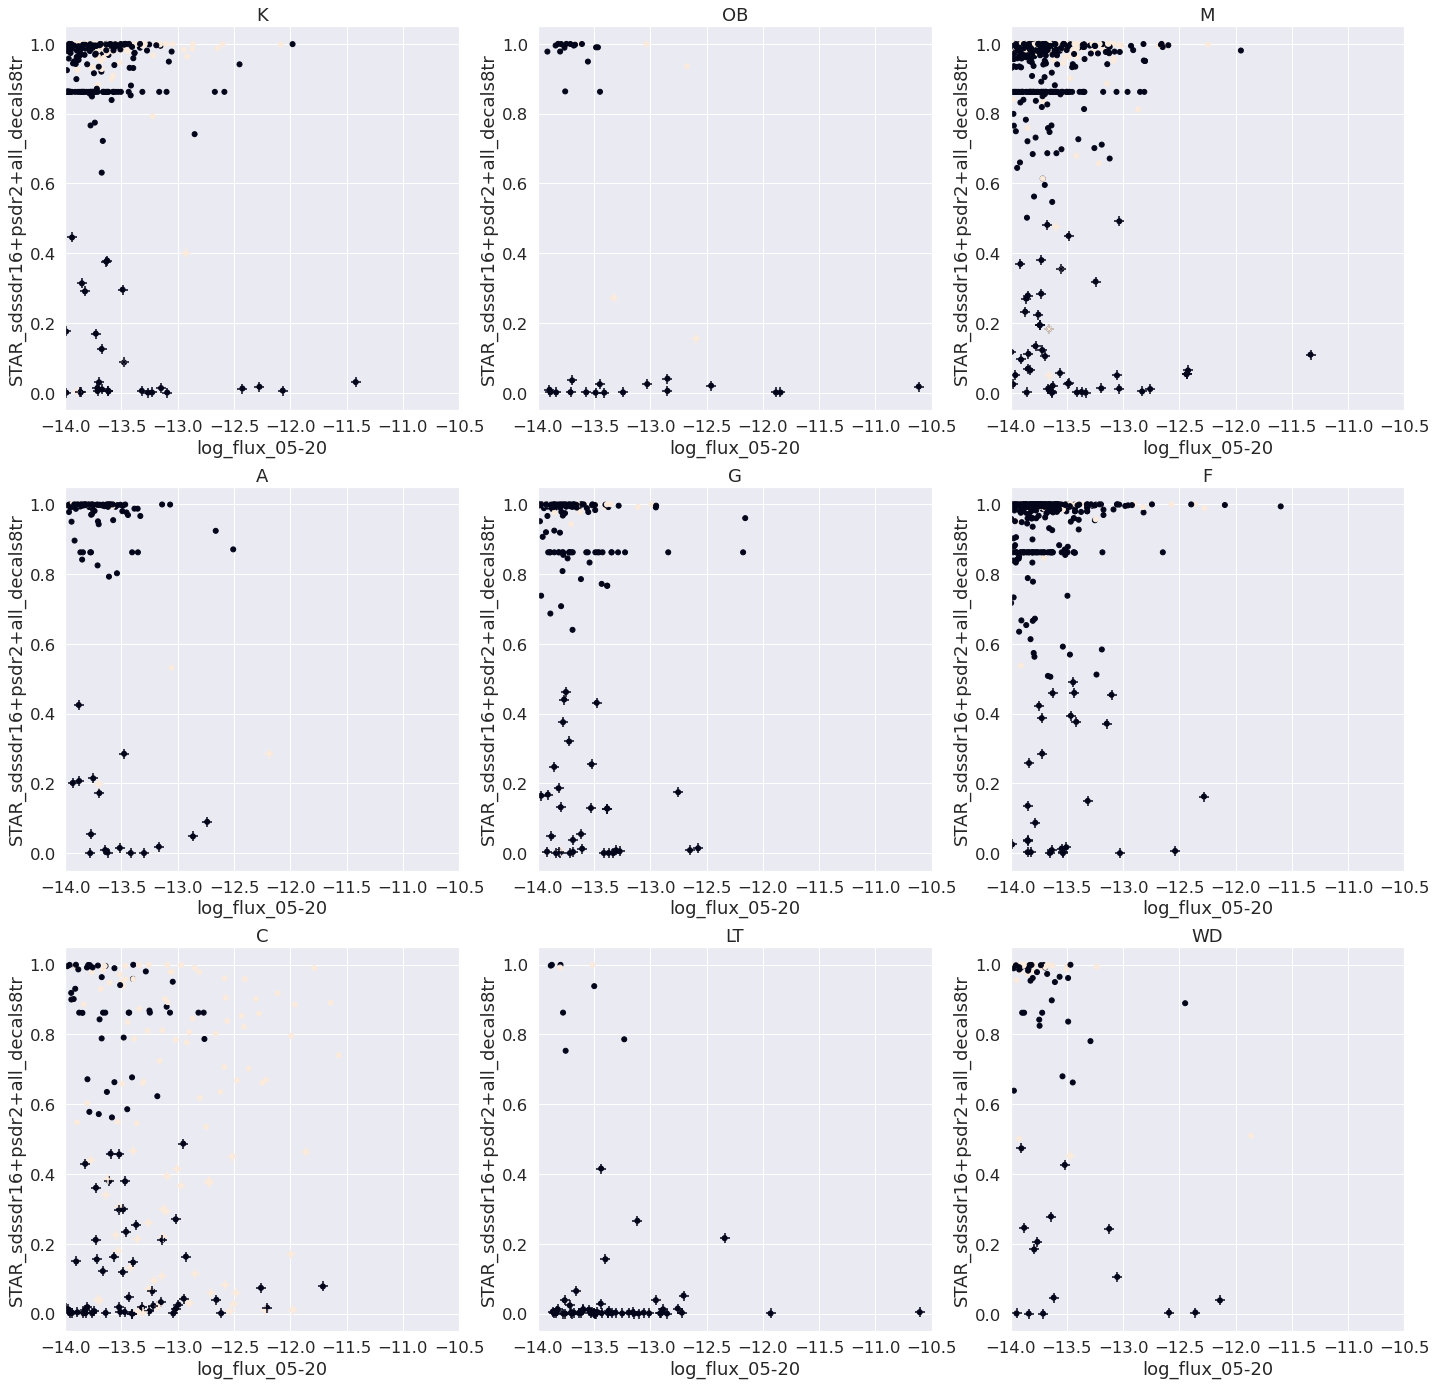

In [345]:
fig, ax = plt.subplots(nrows = 3, ncols=3, figsize = (24, 24))
from matplotlib import colors
x = 'log_flux_05-20'
y = 'STAR_sdssdr16+psdr2+all_decals8tr'
norm = colors.Normalize(vmin=0.0, vmax=1.0)
for en, i in enumerate(sub_class):
    j = [en//3, en%3]
    ax[j[0]][j[1]].set_title(i)
    ax[j[0]][j[1]].set_xlabel(x)
    ax[j[0]][j[1]].set_ylabel(y)
    ax[j[0]][j[1]].set_xlim([-14.0, -10.5])
    p = df_star_gaia.loc[(df_star_gaia['subClass'] == i)]
    color = 1 * (p['gaiaedr3_parallax'] / p['gaiaedr3_parallax_error'] > 4.0)
    ax[j[0]][j[1]].scatter(np.log10(p['flux_05-20']),p[y], c=color, marker = '.', s=100, norm=norm)
    p = p.loc[p['STAR_sdssdr16+psdr2+all_decals8tr'] < 0.5]
    color = 1 * (p['gaiaedr3_parallax'] / p['gaiaedr3_parallax_error'] > 4.0)
    ax[j[0]][j[1]].scatter(np.log10(p['flux_05-20']),p[y], c=color, marker = '+', s=100, norm=norm)


In [349]:
!ls

eRo111_SDSS_stars.gz_pkl  subclass1_NadezdaMalysheva.csv
eRo111_train_cv_0.gz_pkl  Tikhony_ne_snilos.ipynb
eRo111_train_cv_1.gz_pkl


In [350]:
s = pd.read_csv('subclass1_NadezdaMalysheva.csv')

In [361]:
[i for i in s.subClass.values if 'C' in i]

TypeError: argument of type 'float' is not iterable

In [369]:
for i in s.subClass.values:
    print(i)

STARBURST BROADLINE
B0.5Ibe... (187459)
B2.5V (175426)
O
G2
G9IV (100030)
WD
B9.5V+... (37269)
K0IIIa (57669)
B0.5Iae (185859)
M2Iab: (36389)
O9.5Iae (30614)
L1
M2III (169305)
A4p (G_37-26)
A5Ia (17378)
B5 (338529)
B8Ib (208501)
F9
B2III (35468)
G0Va (143761)
K5III (120933)
K5Ve (118100)
M9
M2
M3III (44478)
M4II (175588)
B8IV (171301)
B9Vn (177756)
B1Ve (212571)
B5III (209419)
G8V (101501)
M5Iab: (197812)
A0
AGN
G0Ib (204867)
M7
B2IV-V (176819)
K3Ib... (17506)
L9
A3Iae (223385)
BROADLINE
B3V (29763)
F3/F5V (30743)
G3Ib (58526)
G5/G6IVw (26297)
K4Iab: (34255)
L0
B7IVe (209409)
F0II (25291)
F2V (33256)
G0 (G_101-29)
WDcooler
A4V (97603)
F0V (90277)
L2
nan
B6IIIpe (109387)
Carbon
F6V (16673)
K1III (18322)
STARFORMING BROADLINE
A1V (95418)
sdF3 (140283)
A6IV (28527)
F6III (61064)
G4V (32923)
K1IVa (142091)
M5III (221615)
WDmagnetic
B9 (105262)
F2III (89254)
F6II (61295)
K3Iab: (4817)
F0Ib (36673)
L4
L5.5
WDhotter
G9Ib (221861)
K3
M4
OB
STARBURST
B2Iaevar (41117)
B9
K5 (110281)
M4.5:III (12

In [371]:
for i in s.subClass.values:
    if 'C' in str(i):
        print(i)

Carbon
CarbonWD
Carbon_lines
CV
CalciumWD
